# Assignment 3: Eigenvectors, eigenvalues, Google PageRank

## Working on the assignment, todo and not todo:
<b><u>Todo</u></b>:<br />
<div class="alert alert-success">
<ul><li>&#x2714; <b> Work by yourself</b> and submit your own assignment, <b>no pairing</b> to other students</li>
<li>&#x2714; Test and save your assignment - <b>submit the last tested and saved version</b></li>
<li>&#x2714; to <b>submit</b> the assignment, download the notebook (File → Download .ipynb in Google Colab)</li>
<li>&#x2714; submit <b>only</b> the <b>ipynb</b> file under the name <b>hw3.ipynb</b></li>
<li>&#x2714; It is advisable to add extra cells to check your code implementation</li></ul>
</div>
<b><u>Not todo</u></b>:<br />
<div class="alert alert-danger">
<ul><li>&#x2718; do <b>NOT</b> submit an <b>empty assignment</b></li>
<li>&#x2718; do <b>NOT submit extra files</b>, <u>unless you're asked to do so</u></li>
<li>&#x2718; <b>Do NOT submit a .py/.txt/.rar/.zip (or any non (.ipynb) file)</b> <u>version for the notebook</u> of the assignment</li>
<li>&#x2718; <b>do NOT change</b> the notebook file name</li></ul>
</div>

In [ ]:
import numpy as np
import numpy.linalg as la
import networkx as nx
import matplotlib.pyplot as plt

## Question 1: eigenvalues and eigenvectors

Matrix  $M=\pmatrix{-3 & -2 & 7 \\ 1 &  6 &  1 \\ 3 & 6 & -1}$ is given.


Q1.1 Find eigenvalues and eigenvectors of the matrix.

<pre> 
Implement the function eigM() that returns a tuple (Eigenvalues, Eigenvectors)
------------
Input parameters:
-nothing-
------------
return value:
- Eigenvalues - list of the eigenvalues of the matrix M
- Eigenvectors - list of the eigenvectors of the matrix M
------------
</pre>



In [ ]:
def eigM():
  return la.eig([[-3, -2, 7],
                 [1, 6, 1],
                 [3, 6, -1]])

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q1.1 --- Test your implementation:
# ---------------------------
print ("Test - Testing the implementation of the 'eigM' function..\n ")
title = "Eigenvalues and eigenvectors of the given matrix:"
l,v = eigM()
print(f"\n {title} ")
print("="*(len(title)+2))
print(f"Eigenvalues: {l}")
print(f"Eigenvectors:\n{v}")
print ("\n\n there will be hidden tests ... ")

Test - Testing the implementation of the 'eigM' function..
 

 Eigenvalues and eigenvectors of the given matrix: 
Eigenvalues: [-6.46105337  1.19242881  7.26862455]
Eigenvectors:
[[ 0.8918004  -0.85816832 -0.28784475]
 [-0.03537069  0.26940197 -0.72244394]
 [-0.45104431 -0.43700081 -0.62866537]]


 there will be hidden tests ... 


Q1.2 The eigenvectors are three-dimensional. Plot projections of eigenvectors on each of 2-dimensional spaces. Hint: a three-dimensional vector $(x_1, x_2, x_3)$ has 3  two-dimensional projections: $(x_1, x_2)$, $(x_1, x_3)$, $(x_2, x_3)$. \\
An example for one of the three plotting will be:

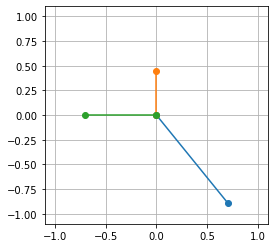

v1


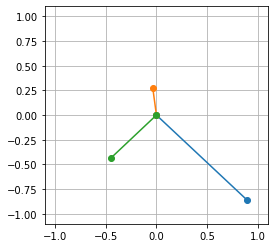

v2


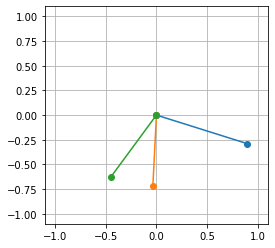

v3


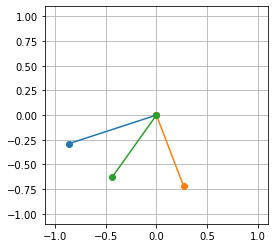

In [180]:
def vectorsPlot (vec,x ,y): # You can use this helper function
  plt.figure(figsize=(4, 4))
  plt.xlim((-1.1, 1.1))
  plt.ylim((-1.1, 1.1))
  plt.grid()
  for vector in vec:
    plt.plot([0,vector[x]], [0,vector[y]], '-o')
  plt.show()

print("v1")
vectorsPlot(v,0 ,1)
print("v2")
vectorsPlot(v,0 ,2)
print("v3")
vectorsPlot(v,1 ,2)

Q1.3 Find a matrix with the same eigenvectors but with eigenvalues of half the value of M's eigenvalues.

<pre> 
Implement the function halfEigenM() that returns the requested Matrix above
------------
Input parameters:
-nothing-
------------
return value:
- A - requested Matrix
------------
</pre>

In [ ]:
def halfEigenM(): 
  M = [[-3, -2, 7],
      [1, 6, 1],
      [3, 6, -1]]
  for v in M:
    for i in range(len(v)):
      v[i] = v[i] * 0.5
  return M

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q1.3 --- Test your implementation:
# ---------------------------
print ("Test - Testing the implementation of the 'halfEigenM' function..\n ")
print(f"new Matrix:\n {halfEigenM()}")
print ("\n\n there will be hidden tests ... ")

Test - Testing the implementation of the 'halfEigenM' function..
 
new Matrix:
 [[-1.5, -1.0, 3.5], [0.5, 3.0, 0.5], [1.5, 3.0, -0.5]]


 there will be hidden tests ... 


Q1.4. Find a matrix with the same eigenvalues as M from Q1.1 but different eigenvectors.

<pre> 
compute diffVectorsM() that returns the requested Matrix above
------------
Input parameters:
-nothing-
------------
return value:
- M - requested Matrix
------------
</pre>

In [ ]:
def diffVectorsM():
  M = [[l[0], 0,  0],
      [0, l[1], 0],
      [0, 0, l[2]]]
  return la.eig(M) 

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q1.4 --- Test your implementation:
# ---------------------------
print ("Test - Testing the implementation of the 'diffVectorsM' function..\n ")
print(f"new Matrix:\n {diffVectorsM()}")
print ("\n\n there will be hidden tests ... ")

Test - Testing the implementation of the 'diffVectorsM' function..
 
new Matrix:
 (array([-6.46105337,  1.19242881,  7.26862455]), array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]))


 there will be hidden tests ... 


Q1.5 Write a function that given a list of eigenvalues, returns a matrix with those eigenvalues. Example:

```
>> eigenvalues_to_matrix([0, 2])
[[1, -1],
 [-1, 1]]
```

<pre> 
Implement the function eigenvalues_to_matrix(eigenvalues) satisfying the requirments above 
------------
Input parameters:
- eigenvalues - list of eigenvalues 
------------
return value:
- M - requested Matrix
------------
</pre>

In [ ]:
def eigenvalues_to_matrix(eig_vals):
  n = len(eig_vals)
  M = []

  for i in range(n):
    R = []
    for j in range(n):
      R.append(0)
    R[i] = eig_vals[i]
    M.append(R)
  return M

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q1.5 --- Test your implementation:
# ---------------------------
print ("Test - Testing the implementation of the 'eigenvalues_to_matrix' function..\n ")
print(f"new Matrix:\n {eigenvalues_to_matrix([8, 7, 6])}")
print ("\n\n there will be hidden tests ... ")

Test - Testing the implementation of the 'eigenvalues_to_matrix' function..
 
new Matrix:
 [[8, 0, 0], [0, 7, 0], [0, 0, 6]]


 there will be hidden tests ... 


## Question 2: Google PageRank

A directed graph $G$ is given:

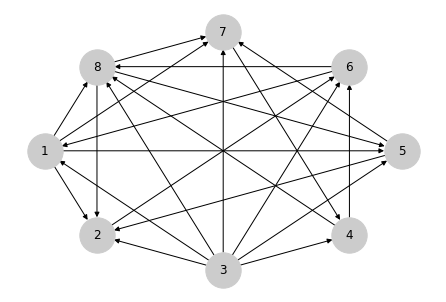

Q2.1  Write adjacency matrix $A$ for $G$.
<pre> 
Implement adj_matrix() according to the image above 
------------
Input parameters:
- nothing -
------------
return value:
- M - requested Matrix
------------
</pre>

In [ ]:
def adj_matrix():
  M = np.array([[0, 0, 1, 0, 0, 1, 0, 0],
                [1, 0, 1, 0, 1, 0, 0, 1],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0, 1, 0],
                [1, 0, 1, 0, 0, 0, 0, 1],
                [0, 1, 1, 1, 0, 0, 0, 0],
                [1, 0, 1, 0, 1, 0, 0, 1],
                [1, 0, 1, 1, 0, 1, 0, 0]])
  return M

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q2.1 --- Test your implementation:
# ---------------------------
print ("Test - Testing the implementation of the 'adj_matrix' function..\n ")
print(f"the adjacency matrix:\n {np.array(adj_matrix())}")
print ("\n\n there will be hidden tests ... ")

Test - Testing the implementation of the 'adj_matrix' function..
 
the adjacency matrix:
 [[0 0 1 0 0 1 0 0]
 [1 0 1 0 1 0 0 1]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0]
 [1 0 1 0 0 0 0 1]
 [0 1 1 1 0 0 0 0]
 [1 0 1 0 1 0 0 1]
 [1 0 1 1 0 1 0 0]]


 there will be hidden tests ... 


Q2.2  Compute Google PageRank of all nodes in $G$.
<br><b>Use the iterative solution</b>

<pre> 
Implement PG_rank_iter(M) that returns a vector of pagerank of all nodes of Matrix (for any matrix)
------------
Input parameters:
- M - Matrix to apply pagerank to
- d - Damping factor (default value = 0.85 as seen in class)
------------
return value:
- pagerank_vector - pagerank vector of all the nodes
------------
</pre>


In [ ]:
def PG_rank_iter(M,d=0.85):
  
  norms = np.sum(M, axis=0)
  norms[norms==0]=1
  M = M/norms

  N = M.shape[1]
  v = []

  for i in range(N):
    v.append([1/N])
  for j in range(100):
    v = d * M @ v + (1-d)/N
  return v[:,0]   

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q2.2 --- Test your implementation:
# ---------------------------
print ("Test - Testing the implementation of the 'PG_rank_iter' function..\n ")
M = adj_matrix()
va = PG_rank_iter(M)
for i in range(len(va)):
    print("Node no.",str(i+1),", google pagerank=",va[i])
print ("\n\n there will be hidden tests ... ")

Test - Testing the implementation of the 'PG_rank_iter' function..
 
Node no. 1 , google pagerank= 0.1033465260577349
Node no. 2 , google pagerank= 0.13517468486902912
Node no. 3 , google pagerank= 0.018750000000000003
Node no. 4 , google pagerank= 0.13592526785296047
Node no. 5 , google pagerank= 0.09485942797826605
Node no. 6 , google pagerank= 0.19369350669046864
Node no. 7 , google pagerank= 0.13517468486902912
Node no. 8 , google pagerank= 0.18307590168251175


 there will be hidden tests ... 


Q2.3  Change the graph edges (in the adjacency matrix of Q2.1) such that node 1 has the highest rank.
<br><b>Use the algebraic solution</b>

<pre> 
Implement n1_highest_Rank() that returns a vector of pagerank of all nodes of the Matrix after the change 
------------
Input parameters:
- Nothing - 
------------
return value:
- pagerank_vector - pagerank vector of all the nodes
------------
</pre>

In [ ]:
def n1_highest_Rank():
  
  M = adj_matrix()
  v = M[0]

  for i in range(len(v)):
    v[i] = 1
  
  norms = np.sum(M, axis=0)
  norms[norms==0]=1
  M = M/norms
  N = M.shape[0]
  d = 0.85

  return  la.inv(np.eye(N) - d * M) @ ((1-d)/N*np.ones(N).T)   

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q2.3 --- Test your implementation:
# ---------------------------
print ("Test - Testing the implementation of the 'n1_highest_Rank' function..\n ")
va = n1_highest_Rank()
for i in range(len(va)):
    print("Node no.",str(i+1),", google pagerank=",va[i])
print ("\n\n there will be hidden tests ... ")


Test - Testing the implementation of the 'n1_highest_Rank' function..
 
Node no. 1 , google pagerank= 0.3057584949585122
Node no. 2 , google pagerank= 0.1309282042475562
Node no. 3 , google pagerank= 0.018750000000000003
Node no. 4 , google pagerank= 0.0766712725194971
Node no. 5 , google pagerank= 0.10202197733575807
Node no. 6 , google pagerank= 0.0983947997333546
Node no. 7 , google pagerank= 0.1309282042475562
Node no. 8 , google pagerank= 0.13654704695776604


 there will be hidden tests ... 


Q2.4 Write a function that inverts the directions of all edges of a graph, given its adjacency matrix M

<pre> 
Write invert_graph(M) that returns the adjacency matrix of the inverted graph  
------------
Input parameters:
- M - Adjacency matrix of some graph
return value:
- M_inv - Adjacency matrix of the inverted graph
------------
</pre>

In [ ]:
def invert_graph(M):
  for i in range(len(M)):
    for j in range(len(M[i])):
      if M[i][j] == 0:
        M[i][j] = 1
      else:
        M[i][j] = 0
  return M

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q2.4 --- Test your implementation:
# ---------------------------
print ("Test - Testing the implementation of the 'invert_graph' function..\n ")
print(f"the inverted graph adjacency matrix is :\n {invert_graph(np.array(adj_matrix()))}")
print ("\n\n there will be hidden tests ... ")

Test - Testing the implementation of the 'invert_graph' function..
 
the inverted graph adjacency matrix is :
 [[1 1 0 1 1 0 1 1]
 [0 1 0 1 0 1 1 0]
 [1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 0 1]
 [0 1 0 1 1 1 1 0]
 [1 0 0 0 1 1 1 1]
 [0 1 0 1 0 1 1 0]
 [0 1 0 0 1 0 1 1]]


 there will be hidden tests ... 


Q2.5 How many iterations of iterative PageRank algorithm are required to approximate the exact (algebraic) PageRank algorithm with less than 0.025% error?
Hint: use L1 norm `la.norm(vector, 1)` to determine the relative error between v_alg and v_iter. 
\begin{align}
      \text{relative error = }\frac{||v_{alg} - v_{iter}||}{||v_{alg}||}
    \end{align}
For reading more about norms: https://en.wikipedia.org/wiki/Norm_(mathematics) 

<pre> 
Write PageRank_iterative_by_percent(M, precent, d) that returns the number of iterations need for less than 0.025% error
------------
Input parameters:
- M -   numpy array
        adjacency matrix 
        
- percent -   float
        error by percentages
      
- d -   float, optional
        damping factor, by default 0.85


return value:
- answer - int
            number of iterations to meet the desired percentages
------------
</pre>

In [ ]:
def PageRank_iterative_by_percent(M,percent,d=0.85): 

  norms = np.sum(M, axis=0)
  norms[norms==0]=1
  M = M/norms
  N = M.shape[0]

  v_alg = la.inv(np.eye(N) - d * M) @ ((1-d)/N*np.ones(N).T)

  n = M.shape[1]
  v_iter = []

  for i in range(n):
     v_iter.append([1/n])
    
  v_iter = d * M @ v_iter + (1-d)/n
  Iterations = 1

  while (la.norm(v_alg - v_iter[:,0], 1) / la.norm(v_alg, 1)) >= percent:
    Iterations = Iterations + 1
    v_iter = d * M @ v_iter + (1-d)/n
  return Iterations

In [ ]:
# --------------------------- RUN THIS TEST CODE CELL -------------------------------------
# Q2.5 --- Test your implementation:
# ---------------------------
print ("Test - Testing the implementation of the 'PageRank_iterative_by_percent' function..\n ")
percentage = 0.025 # 0.025%
print(f"the itertive PageRank algorithm need to run :   {PageRank_iterative_by_percent(adj_matrix(),percentage)} iterartions")
print ("\n\n there will be hidden tests ... ")

Test - Testing the implementation of the 'PageRank_iterative_by_percent' function..
 
the itertive PageRank algorithm need to run :   4 iterartions


 there will be hidden tests ... 
